In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('datos.csv')

# Mostrar las primeras filas
df.head()


,PAC,EDAD,SEXO,RAZA,LUGAR,HISTORIAL,NUTRIC,VALORES,DIABETES
0,E_001,27,F,Blanca,Centro cívico,Sin antecedentes,25.0,Normal,Sano(a)
1,E_002,27,F,Blanca,Centro cívico,Con antecedentes,27.9,100 mg/dl-120 mg/dl Posible diabetes,Sano(a)
2,E_003,28,F,Blanca,Urbanizaciones,Sin antecedentes,29.0,100 mg/dl-120 mg/dl Posible diabetes,Sano(a)
3,E_004,23,F,Blanca,Urbanizaciones,Sin antecedentes,23.0,Normal,Sano(a)
4,E_005,30,F,Mestiza,Urbanizaciones,Sin antecedentes,23.8,Normal,Sano(a)


In [3]:
# Convertir variables categóricas
categorical_vars = ['SEXO', 'RAZA', 'LUGAR', 'HISTORIAL', 'DIABETES', 'VALORES']
for var in categorical_vars:
    df[var] = df[var].astype('category')

# Convertir 'EDAD' y 'NUTRIC' a numérico
df['EDAD'] = pd.to_numeric(df['EDAD'], errors='coerce')
df['NUTRIC'] = pd.to_numeric(df['NUTRIC'], errors='coerce')

# Verificar tipos de datos
df.dtypes


PAC            object
EDAD            int64
SEXO         category
RAZA         category
LUGAR        category
HISTORIAL    category
NUTRIC        float64
VALORES      category
DIABETES     category
dtype: object

C:\Users\danie\AppData\Local\Temp\ipykernel_17528\3886775506.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Diagnóstico de Diabetes')


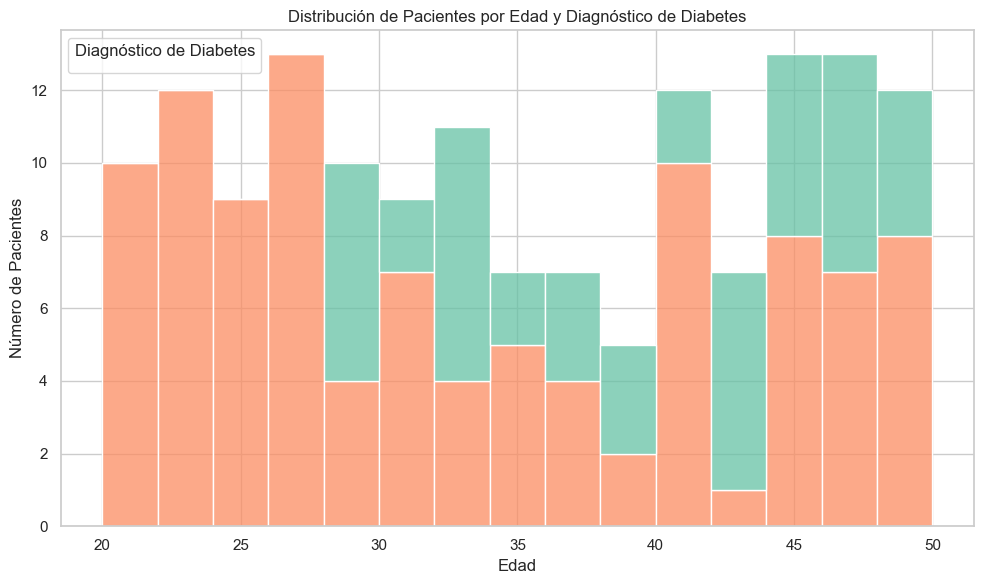

In [4]:
# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EDAD', hue='DIABETES', multiple='stack', bins=15, palette='Set2')
plt.title('Distribución de Pacientes por Edad y Diagnóstico de Diabetes')
plt.xlabel('Edad')
plt.ylabel('Número de Pacientes')
plt.legend(title='Diagnóstico de Diabetes')
plt.tight_layout()
plt.savefig('edad_diabetes.png')
plt.show()


C:\Users\danie\AppData\Local\Temp\ipykernel_17528\2659595949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DIABETES', y='NUTRIC', data=df, palette='Pastel1')


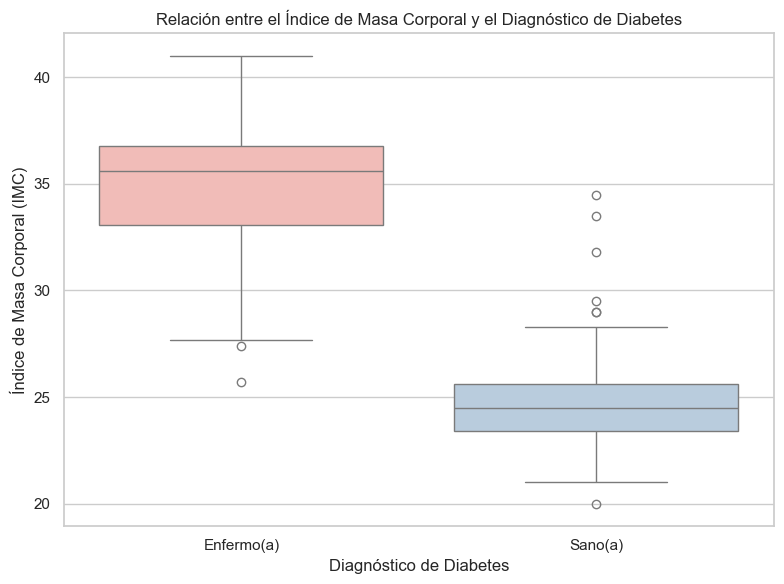

In [5]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='DIABETES', y='NUTRIC', data=df, palette='Pastel1')
plt.title('Relación entre el Índice de Masa Corporal y el Diagnóstico de Diabetes')
plt.xlabel('Diagnóstico de Diabetes')
plt.ylabel('Índice de Masa Corporal (IMC)')
plt.tight_layout()
plt.savefig('imc_diabetes.png')
plt.show()


In [6]:
# Simplificar los niveles de glucemia
def categorize_glucose(value):
    if 'Normal' in value:
        return 'Normal'
    elif '100 mg/dl-120 mg/dl' in value:
        return '100-120 mg/dl'
    elif '120 mg/dl-200 mg/dl' in value:
        return '120-200 mg/dl'
    elif '>200 mg/dl' in value:
        return '>200 mg/dl'
    else:
        return 'Desconocido'

df['GLUCEMIA_CATEGORIA'] = df['VALORES'].apply(categorize_glucose)

# Verificar los nuevos valores
df['GLUCEMIA_CATEGORIA'].value_counts()


GLUCEMIA_CATEGORIA
Normal           74
100-120 mg/dl    31
>200 mg/dl       23
120-200 mg/dl    22
Name: count, dtype: int64

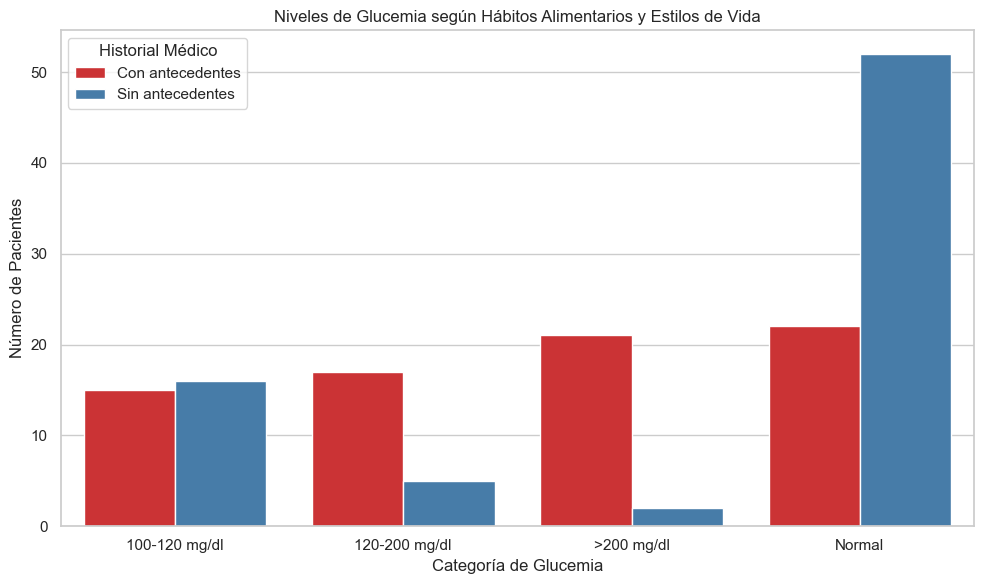

In [7]:
# Crear el countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GLUCEMIA_CATEGORIA', hue='HISTORIAL', palette='Set1')
plt.title('Niveles de Glucemia según Hábitos Alimentarios y Estilos de Vida')
plt.xlabel('Categoría de Glucemia')
plt.ylabel('Número de Pacientes')
plt.legend(title='Historial Médico')
plt.tight_layout()
plt.savefig('glucemia_estilos_vida.png')
plt.show()
